# RAPPORT

Dans ce notebook nous allons analyser les données du budget français. Les étapes de notre projet sont:
- 1. Présentation de la base de donnée 
- 2. Analyse exploratoire 
- 3. Analyse en composantes principales 
- 4. Discussion



## 1.  Présentation de la base de donnée. 

Les données viennent d'un ouvrage de Gilbert Saporta. Il s'agit de l’étude des différents postes du budget de l’état français de 1872 à 1971. Les valeurs sont données en pourcentage du budget global pour éliminer l’effet de l’évolution de la valeur du franc nominal au cours du temps. Les intitulés complets des variables
sont : 
- PVP : Pouvoirs publics,
- AGR : Agriculture,
- CMI : Commerce et industrie,
- TRA : Travail,
- LOG : Logement,
- EDU : éducation,
- ACS : Action sociale,
- ANC : Anciens combattants,
- DEF : Défense,
- DET : Remboursement de la dette,
- DIV : Divers.

In [38]:
# on importe les packages 

import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA, KernelPCA

from scipy.stats import pearsonr



In [39]:
# on importe le dataframe 

data = pd.read_excel("./budgets.xls", sheet_name=0, header=0, index_col=0)


Nous remarquons que :
* Les données actives sont situées dans la première feuille (`sheet_name = 0`) ;
* La première ligne correspond aux noms des variables (`header = 0`)
* La première colonne aux identifiants des observations (`index_col = 0`).

In [40]:
# on verifie que tout a été bien importé
# attention: En cas d'erreur, pip install xlrd

data.head()

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ANC,DEF,DET,DIV
AN,,,,,,,,,,,
1872,18.0,0.5,0.1,6.7,0.5,2.1,2.0,0.0,26.4,41.5,2.1
1880,14.1,0.8,0.1,15.3,1.9,3.7,0.5,0.0,29.8,31.3,2.5
1890,13.6,0.7,0.7,6.8,0.6,7.1,0.7,0.0,33.8,34.4,1.7
1900,14.3,1.7,1.7,6.9,1.2,7.4,0.8,0.0,37.7,26.2,2.2
1903,10.3,1.5,0.4,9.3,0.6,8.5,0.9,0.0,38.4,27.2,3.0


In [41]:
# afficher les infos et vérifier le type de notre base de donnée

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1872 to 1971
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PVP     24 non-null     float64
 1   AGR     24 non-null     float64
 2    CMI    24 non-null     float64
 3   TRA     24 non-null     float64
 4   LOG     24 non-null     float64
 5    EDU    24 non-null     float64
 6   ACS     24 non-null     float64
 7    ANC    24 non-null     float64
 8   DEF     24 non-null     float64
 9   DET     24 non-null     float64
 10   DIV    24 non-null     float64
dtypes: float64(11)
memory usage: 2.2 KB


Toutes nos données sont de type float. On a que des variables quantitatives. Place à l'analyse exploratoire pour comprendre nos données! 

## 2. ANALYSE EXPLORATOIRE 

Dans cette partie, on *explorera* notre jeu de donnée. Cette partie est essentielle pour la compréhension de notre jeu de donnée (statistiques descriptives, visualisation). C'est également dans cette partie que l'on vérifiera si le jeu de donnée est *clean*. 


In [42]:
# vérifions s'il y a des valeurs manquantes

data.isnull().sum()

PVP     0
AGR     0
 CMI    0
TRA     0
LOG     0
 EDU    0
ACS     0
 ANC    0
DEF     0
DET     0
 DIV    0
dtype: int64

Il n y en a pas! 

In [43]:
# verifions s'il y a des doublons. 

data.duplicated()

 AN
1872    False
1880    False
1890    False
1900    False
1903    False
1906    False
1909    False
1912    False
1920    False
1923    False
1926    False
1929    False
1932    False
1935    False
1938    False
1947    False
1950    False
1953    False
1956    False
1959    False
1962    False
1965    False
1968    False
1971    False
dtype: bool

il n y a pas de doublons. 

In [44]:
n, p = data.shape
print(f'Notre dataframe contient {n} lignes et {p} colonnes')


Notre dataframe contient 24 lignes et 11 colonnes


In [45]:
# recupérer les lignes et les colonnes

ligne = data.index

colonne = data.columns

In [46]:
# les indicateurs statistiques 

data.describe()

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ANC,DEF,DET,DIV
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.212500,1.995833,3.941667,8.320833,3.958333,9.941667,4.816667,4.275000,30.258333,19.141667,1.183333
std,2.238267,1.681221,4.585603,2.520866,4.271841,5.335600,3.482087,4.244203,7.466733,12.455972,1.047841
min,7.600000,0.300000,0.100000,4.500000,0.500000,2.100000,0.500000,0.000000,18.800000,3.500000,0.000000
25%,10.575000,0.800000,0.400000,6.675000,0.675000,7.325000,1.800000,0.000000,25.925000,6.350000,0.000000
50%,12.600000,1.400000,1.300000,8.000000,1.850000,8.700000,4.550000,3.800000,29.150000,19.300000,1.400000
75%,13.425000,2.650000,7.350000,9.150000,6.200000,10.600000,6.800000,5.450000,37.025000,26.450000,2.025000
max,18.000000,6.000000,16.500000,15.300000,15.800000,23.800000,11.300000,13.400000,42.400000,41.600000,3.000000


Comme interprétation: En moyenne, 12% du budget de l'Etat était alloué au pouvoir publics, 1.9% à l'agriculture, 30% à la défense.

La variance la plus dispersée est DET car son écart type est plus elevé. La variable qui prend les valeurs les plus importante est DEF. 

On constate que les variances sont très dispersé, il est donc important de travailler avec des variables reduites ou standardisées. 

### Indicateurs statistiques utiles 



In [57]:
# calcul de l'inertie du nuage de points 

inertie = sum(np.var(data))
inertie

C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


310.57244791666665

In [48]:
# créer une variable qui contient la matrice de covariance 

mat_cov = ((n-1)/n) * data.cov()
mat_cov

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ANC,DEF,DET,DIV
PVP,4.801094,-0.304948,-0.003854,1.258490,0.326354,-1.717187,-0.981458,-6.253438,1.618438,0.896562,0.335625
AGR,-0.304948,2.708733,4.433924,-1.120330,2.998993,6.286840,4.520069,0.302813,-5.393924,-13.946076,-0.467986
CMI,-0.003854,4.433924,20.151597,1.029965,16.727153,10.951181,9.505556,0.419792,-17.599097,-44.020903,-1.602639
TRA,1.258490,-1.120330,1.029965,6.089983,1.714201,-2.747535,-1.708264,-3.211562,2.849618,-4.463785,0.289514
LOG,0.326354,2.998993,16.727153,1.714201,17.488264,5.075486,6.953194,0.776875,-11.571736,-38.654514,-1.878611
EDU,-1.717187,6.286840,10.951181,-2.747535,5.075486,27.282431,15.578889,3.406458,-20.008264,-42.688819,-1.332222
ACS,-0.981458,4.520069,9.505556,-1.708264,6.953194,15.578889,11.619722,4.081667,-14.131389,-33.593194,-1.851806
ANC,-6.253438,0.302813,0.419792,-3.211562,0.776875,3.406458,4.081667,17.262708,-12.659792,-2.501042,-1.608750
DEF,1.618438,-5.393924,-17.599097,2.849618,-11.571736,-20.008264,-14.131389,-12.659792,53.429097,23.319653,0.153056
DET,0.896562,-13.946076,-44.020903,-4.463785,-38.654514,-42.688819,-33.593194,-2.501042,23.319653,148.686597,6.928611


In [49]:
# on peut vérifier que la trace de cette matricce vaut l'inertie 

np.trace(mat_cov)  

310.57244791666676

L'inertie est égale à la trace de la matrice de covariance! 

In [71]:
# calculer la matrice de correlation

correlation = data.corr()
correlation

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ANC,DEF,DET,DIV
PVP,1.000000,-0.084561,-0.000392,0.232740,0.035616,-0.150040,-0.131403,-0.686901,0.101050,0.033556,0.149324
AGR,-0.084561,1.000000,0.600137,-0.275838,0.435732,0.731321,0.805683,0.044283,-0.448366,-0.694917,-0.277202
CMI,-0.000392,0.600137,1.000000,0.092974,0.891033,0.467051,0.621191,0.022507,-0.536348,-0.804208,-0.348038
TRA,0.232740,-0.275838,0.092974,1.000000,0.166104,-0.213154,-0.203072,-0.313223,0.157975,-0.148340,0.114369
LOG,0.035616,0.435732,0.891033,0.166104,1.000000,0.232361,0.487768,0.044712,-0.378561,-0.758038,-0.437935
EDU,-0.150040,0.731321,0.467051,-0.213154,0.232361,1.000000,0.874978,0.156967,-0.524058,-0.670250,-0.248646
ACS,-0.131403,0.805683,0.621191,-0.203072,0.487768,0.874978,1.000000,0.288194,-0.567150,-0.808198,-0.529595
ANC,-0.686901,0.044283,0.022507,-0.313223,0.044712,0.156967,0.288194,1.000000,-0.416853,-0.049366,-0.377468
DEF,0.101050,-0.448366,-0.536348,0.157975,-0.378561,-0.524058,-0.567150,-0.416853,1.000000,0.261636,0.020413
DET,0.033556,-0.694917,-0.804208,-0.148340,-0.758038,-0.670250,-0.808198,-0.049366,0.261636,1.000000,0.553932


<Axes: >

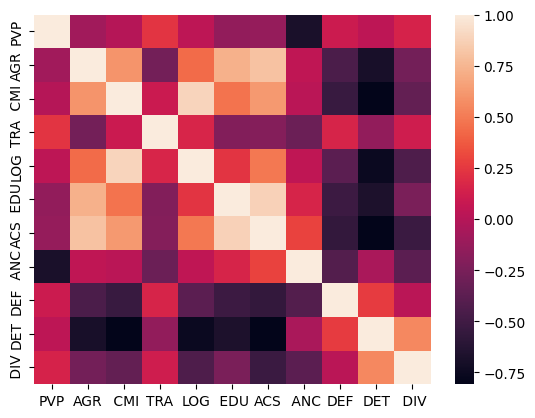

In [74]:
# on peut faire le heatmap 

sns.heatmap(data = correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

On considère que deux variables sont indépendants s'ils sont orthogonauux, ie, si leur correlation est proche de 0. Par exemple, LOG et CMI sont positivement correlés, ACS et EDU également. DET et CMI sont négativement correlés, PVP et CMI sont indépendant.
|correlation| < 1


### Centrage et reduction 

On peut pour cela utiliser la classe `StandardScaler` de scikit learn.

- Scikit-learn manipule des numpy.ndarray et non des `pandas.DataFrame`. On peut très bien appliquer les fonctions de Scikit-learn à un DataFrame mais la sortie sera de type `numpy.ndarray`. Si on veut retrouver un DataFrame, on doit effectuer une transformation grâce à `pd.DataFrame`.
- La fonction précédente centre et réduit au sens de numpy (donc non corrigé). 
- Après la transformation précédente, on a perdu le nom des variables et des individus.


In [81]:
# centrons et reduisons nos données

scaler = StandardScaler()

data_cr = scaler.fit_transform(data)

print(f'le type est : {type (data_cr)}')

print("---"*10)

pd.DataFrame(data_cr).head(2)

le type est : <class 'numpy.ndarray'>
------------------------------


,0,1,2,3,4,5,6,7,8,9,10
0,2.641319,-0.908867,-0.855786,-0.656796,-0.826977,-1.501298,-0.826300,-1.02892,-0.527850,1.833595,0.893630
1,0.861424,-0.726587,-0.855786,2.828105,-0.492201,-1.194976,-1.266341,-1.02892,-0.062704,0.997099,1.283578


In [78]:
# on peut centrer et réduire à la main : 

data_c = data - data.mean()

data_cr_2 = data_c /np.std(data_c)

data_cr_2.head(2)

C:\Users\cheri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ANC,DEF,DET,DIV
AN,,,,,,,,,,,
1872,2.641319,-0.908867,-0.855786,-0.656796,-0.826977,-1.501298,-0.826300,-1.02892,-0.527850,1.833595,0.893630
1880,0.861424,-0.726587,-0.855786,2.828105,-0.492201,-1.194976,-1.266341,-1.02892,-0.062704,0.997099,1.283578


In [95]:
# caldcul de la distance euclidienne entre deux individus à la main

distance_23_28 = (sum(((data_cr_2.loc[1923]) - (data_cr_2.loc[1938]))**2))**0.5
distance_23_28



3.15042114269945

In [93]:
# avec la fonction dist de la librairie math 

import math 

distance = math.dist(data_cr_2.loc[1923], data_cr_2.loc[1938] )

distance

3.1504211426994506

In [106]:
# Coder une fonction pour afficher les distances entre individus (sous forme de tableau n x n )

def distance(df):
    distance = np.zeros((n,n))
    for j in range(n):
        for i in range(n):
            distance[i,j] = (sum(((df.iloc[i]) - (df.iloc[j]))**2))**0.5

    distance = pd.DataFrame(distance, index= df.index, columns = df.index)
    return distance 


In [108]:
# calculer la distance:

distance(data_cr_2).head()

AN,1872,1880,1890,1900,1903,1906,1909,1912,1920,1923,...,1938,1947,1950,1953,1956,1959,1962,1965,1968,1971
AN,,,,,,,,,,,,,,,,,,,,,
1872,0.000000,4.100424,2.577799,2.944823,4.503247,3.336739,3.403328,4.148377,4.715762,5.624181,...,5.514868,5.485132,7.413175,5.833714,6.920588,6.227104,6.541947,6.878324,7.531122,7.066119
1880,4.100424,0.000000,3.665174,3.739886,3.434265,3.444412,3.133561,3.653821,3.385820,5.926555,...,5.754975,4.907049,6.172903,5.711575,6.742206,6.732303,6.844369,6.523814,7.682673,7.060849
1890,2.577799,3.665174,0.000000,1.233589,2.441587,1.290076,1.831637,2.314383,3.159973,3.923851,...,3.583342,4.773121,6.609814,4.624678,5.781350,5.288303,5.583272,6.001045,6.551989,6.127663
1900,2.944823,3.739886,1.233589,0.000000,2.250989,0.875184,1.405077,2.017251,3.306264,4.432579,...,3.699979,4.466176,6.430428,4.362373,5.471515,5.009220,5.322279,5.666860,6.169959,6.089665
1903,4.503247,3.434265,2.441587,2.250989,0.000000,1.867439,1.745359,2.392562,3.411250,4.154772,...,3.939878,5.360917,6.438006,5.090606,5.873410,5.845232,5.974043,5.839202,6.397769,6.483414


In [110]:
# les coordonnées du centre de gravité au nuage de points : 

coordonnée = data.mean()
coordonnée

PVP     12.212500
AGR      1.995833
 CMI     3.941667
TRA      8.320833
LOG      3.958333
 EDU     9.941667
ACS      4.816667
 ANC     4.275000
DEF     30.258333
DET     19.141667
 DIV     1.183333
dtype: float64

In [124]:
# calculons et stockons les distances par rapport au centre de gravité

distance_c = np.sum(((data - coordonnée)**2), axis=1)**0.5

pd.DataFrame({'Distance au centre de gravité':distance_c})

,Distance au centre de gravité
AN,
1872,25.853458
1880,17.272318
1890,17.794066
1900,12.891811
1903,14.103267
1906,12.641814
1909,10.536111
1912,12.771406
1920,15.850830


On peut constater que ces distances correspondent à la contribution des individus à l'inertie totale.  1968, 1950, 1926, 1872 contribuent le plus à 
l'inertie totale (s'éloignent du centre de gravité)

In [126]:
# inertie 
(distance_c**(1/0.5)).mean()

310.5724479166667

On retrouve donc la valeur de l'inertie à la virgule prête! 

## 3. Analyse en composante principale 

Dans cette partie, on va faire l'ACP *à la main* puis l'ACP à l'aide du package PCA. 

### a. A la main

L'algorithme est: 
- Calculer les valeurs propres et les vecteurs propres de la matrice de covariance
- Déterminer les nouvelles coordonnées des individus dans la nouvelle base formée par les vecteurs propres


In [131]:
# valeurs propres et vecteurs propres

valeur_propre, vecteur_propre = np.linalg.eig(mat_cov)


array([[ 0.00998634, -0.06915874, -0.16295472,  0.3568937 ,  0.0365139 ,
        -0.72232777, -0.29900134, -0.0871545 ,  0.18389085,  0.31559977,
        -0.29611239],
       [-0.08626417,  0.03095442,  0.07453333,  0.08176655, -0.19774776,
         0.00395933, -0.29426461, -0.47355107,  0.38417465, -0.6923577 ,
        -0.04947585],
       [-0.27090232,  0.05210781, -0.40343484,  0.02030407, -0.27342774,
         0.42838577, -0.30181714,  0.00802381, -0.23928601,  0.10743036,
        -0.58522701],
       [-0.01181701, -0.11635525, -0.20551073,  0.05911251,  0.8723747 ,
         0.15683867, -0.30293193, -0.13595374, -0.15731191, -0.13553617,
         0.0398575 ],
       [-0.2275414 , -0.03428071, -0.49772422, -0.1796247 , -0.23067418,
        -0.06013632, -0.302758  , -0.11081967, -0.00599556,  0.169328  ,
         0.69106949],
       [-0.27225222,  0.19035938,  0.57819158,  0.37179843, -0.00190398,
         0.27797531, -0.29679485, -0.22045841, -0.01059323,  0.4081241 ,
         0.190

In [133]:
#Déterminer les nouvelles coordonnées des individus dans la nouvelle base formée par les vecteurs propres

"""la fonction .dot() de numpy permet de faire le produit """

nouvelles_coordonnées = np.dot(mat_cov, vecteur_propre)

nouvelles_coordonnées



array([[ 2.04437583e+00, -3.86054844e+00, -3.57989808e+00,
         5.85384488e+00,  2.01629704e-01, -2.22310854e+00,
        -3.82317151e-05, -2.15984027e-02,  1.16181415e-01,
         3.50719778e-01, -3.17462848e-01],
       [-1.76597583e+01,  1.72792379e+00,  1.63739806e+00,
         1.34115206e+00, -1.09196286e+00,  1.21856439e-02,
        -3.76260549e-05, -1.17354205e-01,  2.42719822e-01,
        -7.69403403e-01, -5.30431852e-02],
       [-5.54583615e+01,  2.90873921e+00, -8.86292596e+00,
         3.33031605e-01, -1.50986756e+00,  1.31844309e+00,
        -3.85917562e-05,  1.98843941e-03, -1.51179830e-01,
         1.19385227e-01, -6.27423362e-01],
       [-2.41914448e+00, -6.49513128e+00, -4.51479690e+00,
         9.69575678e-01,  4.81725180e+00,  4.82702463e-01,
        -3.87342988e-05, -3.36917053e-02, -9.93889593e-02,
        -1.50618665e-01,  4.27313283e-02],
       [-4.65816362e+01, -1.91360294e+00, -1.09343380e+01,
        -2.94624177e+00, -1.27378248e+00, -1.85081583e-01,
  

### 3. Avec PCA 

- Le paramètre `svd_solver = ‘full’` indique que l’algorithme utilisé pour la décomposition en valeurs singulières sera la méthode "exacte". C'est la sélection par défaut pour l’appréhension des bases de taille réduite. D’autres approches sont disponibles pour le traitement des grands ensembles de données. 
- `n_components = None` indique que le nombre de composantes principales n’est pas spécifié, il est par défaut égal au nombre de variables.
- La fonction `.fit` lance l'ACP sur les données.
- La fonction `.fit_transform()` renvoie en sortie les coordonnées factorielles, c'est à dire les coordonnées des individus dans la nouvelle base. On les conserve dans `coordX` .


In [135]:
# on sauve notre numpy array 

np.save("./train_dataset.npy", data_cr)

In [136]:
# instanciation de l'ACP 
pca_data = PCA(svd_solver="full")
type(pca_data)

sklearn.decomposition._pca.PCA

In [139]:
# coordonnée

coord_x = pca_data.fit_transform(data)
coord_x.shape

(24, 11)

### b. inertie expliquée

In [140]:
valeur_propre_data = pca_data.explained_variance_* (n-1/n)
pca_data.singular_values_**2/n

array([2.04717190e+02, 5.58215593e+01, 2.19686678e+01, 1.64022084e+01,
       5.52199853e+00, 3.07770050e+00, 1.11128020e+00, 1.07210254e+00,
       6.31795526e-01, 2.47817424e-01, 1.27864694e-04])

In [152]:
#On s'interesse aussi (et surtout) au pourcentage d'inerte (ou de variance) expliqué par chaque axe que l'on peut retrouver à l'aide de la fontion suivante:

values = pca_data.explained_variance_ratio_

# pourcentage d'inertie expliqué par le premier axe

print(f"le pourcentage d'inertie expliqué par le premier axe est: {(values[0]/sum(values))*100}%")

# # pourcentage d'inertie expliquébpar les deux premiers axes:

print(f"le pourcentage d'inertie expliqué par les deux premuiers axes: {(sum(values[:2])/sum(values))*100}%")

le pourcentage d'inertie expliqué par le premier axe est: 65.91608211505553%
le pourcentage d'inertie expliqué par les deux premuiers axes: 83.88984626175088%
